In [29]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv('C:/Users/Acer/Desktop/guardian_headlines.csv')

In [31]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [32]:
ps = PorterStemmer()
stemmed_dataset = []
for i in range(0,500):
    stemmed_array = df['Headlines'][i].split()
    stemmed = [ps.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmed = ' '.join(stemmed)
    stemmed_dataset.append(stemmed)

In [33]:
df['Headlines'][1].split()

['‘I',
 'now',
 'fear',
 'the',
 'worst’:',
 'four',
 'grim',
 'tales',
 'of',
 'working',
 'life',
 'upended',
 'by',
 'Covid-19']

In [34]:
stopwords.words('english')[:5]

['i', 'me', 'my', 'myself', 'we']

In [35]:
stemmed_dataset[:5]

['johnson ask santa christma recoveri',
 '‘i fear worst’: four grim tale work life upend covid-19',
 'five key area sunak must tackl serv econom recoveri',
 'covid-19 leav firm ‘fatal ill-prepared’ no-deal brexit',
 "the week patriarchi bacardi' 'ladi vodka': latest long line depress gender product"]

In [36]:
from sklearn.feature_extraction.text import CountVectorizer as CV

cv = CV()
X = cv.fit_transform(stemmed_dataset)

In [37]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,max_iter=300, n_init=10,random_state=0,verbose=True)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Initialization complete
Iteration 0, inertia 8375.0.
Iteration 1, inertia 4328.913999999997.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8235.0.
Iteration 1, inertia 4328.913999999997.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9237.0.
Iteration 1, inertia 4328.913999999997.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8611.0.
Iteration 1, inertia 4328.913999999997.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7651.0.
Iteration 1, inertia 4328.913999999997.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8577.0.
Iteration 1, inertia 4328.913999999997.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9299.0.
Iteration 1, inertia 4328.913999999997.
Converged at iteration 1: strict convergence.
Initialization complete
Ite

Iteration 0, inertia 7600.0
Iteration 1, inertia 4166.916858759378
Iteration 2, inertia 4153.395627625654
Iteration 3, inertia 4147.778900478057
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 7782.0
Iteration 1, inertia 4280.84593985066
Iteration 2, inertia 4276.679320702811
Iteration 3, inertia 4273.449905032254
Iteration 4, inertia 4272.129571920613
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 7133.0
Iteration 1, inertia 4143.929407572949
Iteration 2, inertia 4129.695859988971
Iteration 3, inertia 4128.58521008403
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 7285.0
Iteration 1, inertia 4216.826290212349
Iteration 2, inertia 4181.573299618026
Iteration 3, inertia 4135.980548784725
Iteration 4, inertia 4128.264240057509
Iteration 5, inertia 4126.192728371116
Iteration 6, inertia 4125.671502508252
Iteration 7, inertia 4124.793041225986
Iteration 8, iner

Iteration 1, inertia 4119.17398972918
Iteration 2, inertia 4095.5834769644985
Iteration 3, inertia 4094.6368540051863
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 6707.0
Iteration 1, inertia 4140.557709315603
Iteration 2, inertia 4105.104456619896
Iteration 3, inertia 4096.606811146325
Iteration 4, inertia 4094.089969403337
Iteration 5, inertia 4093.0053474444367
Iteration 6, inertia 4090.9751948644634
Iteration 7, inertia 4089.076132969997
Iteration 8, inertia 4088.197629867258
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 7431.0
Iteration 1, inertia 4099.709827746314
Iteration 2, inertia 4032.82059019026
Iteration 3, inertia 4021.84354737481
Iteration 4, inertia 4021.03903385648
Iteration 5, inertia 4019.2144227587246
Iteration 6, inertia 4017.959496530646
Iteration 7, inertia 4015.0155789304804
Iteration 8, inertia 4012.724145177692
Iteration 9, inertia 4012.004795333896
Iteration 10, inertia 

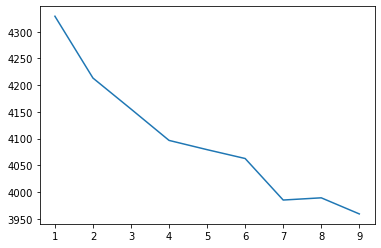

In [38]:
plt.plot(range(1,10),wcss)

In [39]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [40]:
a = cv.transform(['dd'])
model.predict(a)

array([1])

In [51]:
df1 = df
df1 = df1[:500]
df1['labels'] = kmeans.labels_

<ipython-input-51-f8d8bf9a1205>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['labels'] = kmeans.labels_


In [54]:
one = df1[df1['labels'] == 1]

In [55]:
one

,Time,Headlines,labels
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery,1
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...,1
5,18-Jul-20,English councils call for smoking ban outside ...,1
6,18-Jul-20,Can Tesla justify a $300bn valuation?,1
7,18-Jul-20,Empty city centres: 'I’m not sure it will ever...,1
...,...,...,...
492,25-Jun-20,"Planning rules lifted for fairs, markets and c...",1
493,25-Jun-20,Politics live with Andrew Sparrow Papers indi...,1
494,25-Jun-20,The Robert Jenrick planning row explained,1
495,25-Jun-20,EasyJet launches £450m rights issue to shore u...,1
